## Importing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('merge_data_2018_2022.csv')

## Set Frequency to hour

In [2]:
df = df.set_index('DATETIME')
df.index = pd.to_datetime(df.index)
df=df.loc[~df.index.duplicated(), :]
df=df.asfreq('H')
df.index

DatetimeIndex(['2018-01-01 01:00:00', '2018-01-01 02:00:00',
               '2018-01-01 03:00:00', '2018-01-01 04:00:00',
               '2018-01-01 05:00:00', '2018-01-01 06:00:00',
               '2018-01-01 07:00:00', '2018-01-01 08:00:00',
               '2018-01-01 09:00:00', '2018-01-01 10:00:00',
               ...
               '2022-08-28 15:00:00', '2022-08-28 16:00:00',
               '2022-08-28 17:00:00', '2022-08-28 18:00:00',
               '2022-08-28 19:00:00', '2022-08-28 20:00:00',
               '2022-08-28 21:00:00', '2022-08-28 22:00:00',
               '2022-08-28 23:00:00', '2022-08-29 00:00:00'],
              dtype='datetime64[ns]', name='DATETIME', length=40824, freq='H')

## Import data with Gas_Price

In [3]:
df2 = pd.read_csv('DataforTagbo.csv')
df2 = df2.set_index('DATETIME')
df2.index = pd.to_datetime(df.index)
df2=df2.loc[~df.index.duplicated(), :]
df2=df2.asfreq('H')
df2.index


DatetimeIndex(['2018-01-01 01:00:00', '2018-01-01 02:00:00',
               '2018-01-01 03:00:00', '2018-01-01 04:00:00',
               '2018-01-01 05:00:00', '2018-01-01 06:00:00',
               '2018-01-01 07:00:00', '2018-01-01 08:00:00',
               '2018-01-01 09:00:00', '2018-01-01 10:00:00',
               ...
               '2022-08-28 15:00:00', '2022-08-28 16:00:00',
               '2022-08-28 17:00:00', '2022-08-28 18:00:00',
               '2022-08-28 19:00:00', '2022-08-28 20:00:00',
               '2022-08-28 21:00:00', '2022-08-28 22:00:00',
               '2022-08-28 23:00:00', '2022-08-29 00:00:00'],
              dtype='datetime64[ns]', name='DATETIME', length=40824, freq='H')

## Check for missing values for WakeWind LMP

In [4]:
df[['WAKEWE_ALL..RTLMP.']].isnull().value_counts()

WAKEWE_ALL..RTLMP.
False                 40819
True                      5
dtype: int64

## Missing value imputation

In [5]:
df['WAKEWE_ALL..RTLMP.'].fillna(method='bfill', inplace=True)
df[['WAKEWE_ALL..RTLMP.']].isnull().value_counts()

WAKEWE_ALL..RTLMP.
False                 40824
dtype: int64

## Subset the required columns

In [6]:
df = df[['WAKEWE_ALL..RTLMP.','ERCOT..WINDDATA.', 'ERCOT..LOAD_FORECAST.', 'ERCOT..WIND_STWPF.',
             
            'ERCOT..SOLAR_PVGRPP.', 'PEAKTYPE']]

## Median Smoothing

In [7]:
rolling = df['WAKEWE_ALL..RTLMP.'].rolling(window=7)
df['Median Smooth'] = rolling.median()

## Feature engineering to include lag features 

In [8]:
target_map = df['WAKEWE_ALL..RTLMP.'].to_dict()
df['lag1'] = (df.index - pd.Timedelta('1 hours')).map(target_map)
df['lag2'] = (df.index - pd.Timedelta('2 hours')).map(target_map)
df['lag3'] = (df.index - pd.Timedelta('3 hours')).map(target_map)
df['lag4'] = (df.index - pd.Timedelta('4 hours')).map(target_map)
df['lag5'] = (df.index - pd.Timedelta('5 hours')).map(target_map)
df['lag6'] = (df.index - pd.Timedelta('6 hours')).map(target_map)
df['lag7'] = (df.index - pd.Timedelta('7 hours')).map(target_map)
df['lag8'] = (df.index - pd.Timedelta('8 hours')).map(target_map)
df['lag9'] = (df.index - pd.Timedelta('9 hours')).map(target_map)
df['lag10'] = (df.index - pd.Timedelta('10 hours')).map(target_map)
df['lag11'] = (df.index - pd.Timedelta('11 hours')).map(target_map)
df['lag12'] = (df.index - pd.Timedelta('12 hours')).map(target_map)
df['lag13'] = (df.index - pd.Timedelta('13 hours')).map(target_map)
df['lag14'] = (df.index - pd.Timedelta('14 hours')).map(target_map)
df['lag15'] = (df.index - pd.Timedelta('15 hours')).map(target_map)
df['lag16'] = (df.index - pd.Timedelta('16 hours')).map(target_map)
df['lag17'] = (df.index - pd.Timedelta('17 hours')).map(target_map)
df['lag18'] = (df.index - pd.Timedelta('18 hours')).map(target_map)
df['lag19'] = (df.index - pd.Timedelta('19 hours')).map(target_map)
df['lag20'] = (df.index - pd.Timedelta('20 hours')).map(target_map)
df['lag21'] = (df.index - pd.Timedelta('21 hours')).map(target_map)
df['lag22'] = (df.index - pd.Timedelta('22 hours')).map(target_map)
df['lag23'] = (df.index - pd.Timedelta('23 hours')).map(target_map)
df['lag24'] = (df.index - pd.Timedelta('24 hours')).map(target_map)

## Feature engineering to include more features to capture seasonality effect

In [9]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day
df['weekofyear'] = df.index.isocalendar().week

## Include Gas_Price

In [10]:
df['Gas_Price'] = df2.Gas_Price

## Code Peak_Type as an ordinal variable

In [11]:
df['PEAKTYPE_num']= pd.factorize(df.PEAKTYPE)[0]

In [12]:
df['PEAKTYPE_num'].value_counts()

 2    19056
 0    13603
 1     8160
-1        5
Name: PEAKTYPE_num, dtype: int64

## Check for missing values for the whole dataset

In [13]:
df.isna().sum()

WAKEWE_ALL..RTLMP.        0
ERCOT..WINDDATA.          5
ERCOT..LOAD_FORECAST.     5
ERCOT..WIND_STWPF.        5
ERCOT..SOLAR_PVGRPP.      7
PEAKTYPE                  5
Median Smooth             6
lag1                      1
lag2                      2
lag3                      3
lag4                      4
lag5                      5
lag6                      6
lag7                      7
lag8                      8
lag9                      9
lag10                    10
lag11                    11
lag12                    12
lag13                    13
lag14                    14
lag15                    15
lag16                    16
lag17                    17
lag18                    18
lag19                    19
lag20                    20
lag21                    21
lag22                    22
lag23                    23
lag24                    24
hour                      0
dayofweek                 0
quarter                   0
month                     0
year                

## Drop missing values since the proportion is very small

In [14]:
df = df.dropna()

## Train_Test Split for Time Series data

In [15]:
filt1 = (df.index<pd.to_datetime('2022-08-22'))
train = df.loc[filt1]

filt2 = (df.index>=pd.to_datetime('2022-08-22'))
test = df.loc[filt2]


In [16]:
train_y = train[['Median Smooth']]


In [17]:
train_X = train.reset_index().drop(['DATETIME','Median Smooth', 'WAKEWE_ALL..RTLMP.', 'PEAKTYPE' 
                                    ], axis=1)

In [18]:
test_X = test.reset_index().drop(['DATETIME','Median Smooth', 'WAKEWE_ALL..RTLMP.', 'PEAKTYPE' 
                                    ], axis=1)

In [19]:
test_X

,ERCOT..WINDDATA.,ERCOT..LOAD_FORECAST.,ERCOT..WIND_STWPF.,ERCOT..SOLAR_PVGRPP.,lag1,lag2,lag3,lag4,lag5,lag6,...,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Gas_Price,PEAKTYPE_num
0,7283.938333,51437.859985,6850.5,0.0,85.1600,89.2075,131.4950,122.5250,85.8525,83.6450,...,0,0,3,8,2022,234,22,34,9.141,0
1,7516.409167,47886.569580,6880.2,0.0,83.2050,85.1600,89.2075,131.4950,122.5250,85.8525,...,1,0,3,8,2022,234,22,34,9.141,0
2,7553.935000,46543.340210,7075.5,0.0,79.3225,83.2050,85.1600,89.2075,131.4950,122.5250,...,2,0,3,8,2022,234,22,34,9.141,0
3,8022.748333,45208.430298,7447.2,0.0,72.6325,79.3225,83.2050,85.1600,89.2075,131.4950,...,3,0,3,8,2022,234,22,34,9.141,0
4,8150.339167,44741.349731,7156.4,0.0,62.8700,72.6325,79.3225,83.2050,85.1600,89.2075,...,4,0,3,8,2022,234,22,34,9.141,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,17455.504167,67591.720459,17960.7,859.6,73.6950,89.0425,236.8050,95.6050,104.1375,87.5225,...,20,6,3,8,2022,240,28,34,9.503,1
165,15974.634167,65272.369751,16203.7,32.7,78.2375,73.6950,89.0425,236.8050,95.6050,104.1375,...,21,6,3,8,2022,240,28,34,9.503,1
166,16934.967500,63054.700073,16918.6,0.0,84.2475,78.2375,73.6950,89.0425,236.8050,95.6050,...,22,6,3,8,2022,240,28,34,9.503,1
167,16186.700000,59536.980347,16440.9,0.0,73.8950,84.2475,78.2375,73.6950,89.0425,236.8050,...,23,6,3,8,2022,240,28,34,9.503,0


## Model building & training. (use huber loss to deal with remianing extreme values)

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "huber",
}
forest_reg = GradientBoostingRegressor(**params)
forest_reg.fit(train_X, train_y)

C:\Users\Tagbo Aroh\Miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          min_samples_split=5, n_estimators=500)

## Feature importance

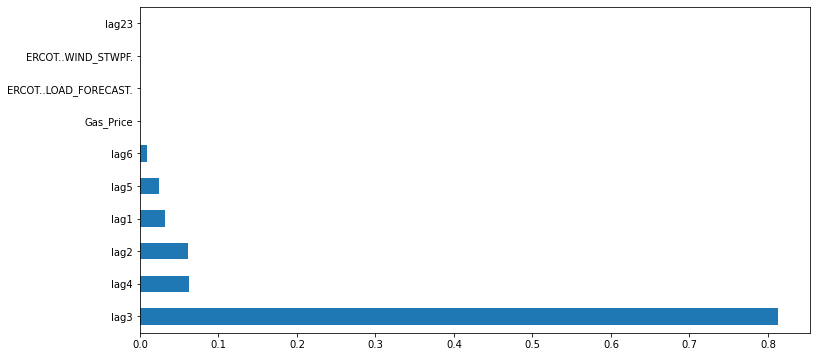

In [21]:
feat_importances = pd.Series(forest_reg.feature_importances_, index=train_X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(12,6))
plt.show()

## Model testing for week ahead

In [22]:
pred1 = forest_reg.predict(test_X)

In [23]:
tt = test['Median Smooth'].reset_index()

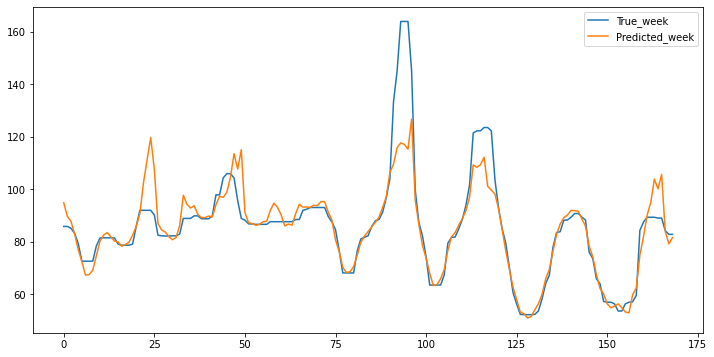

In [24]:
tt['True_week'] = tt['Median Smooth']
tt['Predicted_week'] = pred1
tt[['True_week', 'Predicted_week']].plot(legend=True,figsize=(12,6))
plt.show()

In [25]:
import numpy as np
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
err1 = smape(tt['Median Smooth'], pred1)
print('SMAPE for XGBOOST for week ahead : ', "{:.4}%".format(err1))

SMAPE for XGBOOST for week ahead :  4.648%


## Model testing for day ahead

In [26]:
pred2 = forest_reg.predict(test_X.iloc[:24,])

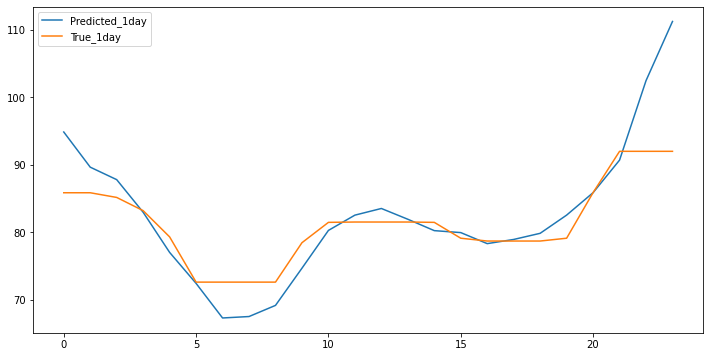

In [27]:
aa = pd.DataFrame(pred2, columns = ['Predicted_1day'])
bb = pd.DataFrame(tt['Median Smooth'].iloc[:24,])
aa['True_1day'] = bb['Median Smooth']
aa.plot(legend=True,figsize=(12,6))
plt.show()

In [28]:
import numpy as np
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
err1 = smape(tt['Median Smooth'].iloc[:24,], pred2)
print('SMAPE for XGBOOST for day ahead: ', "{:.4}%".format(err1))

SMAPE for XGBOOST for day ahead:  3.799%


## Decision Tree Model

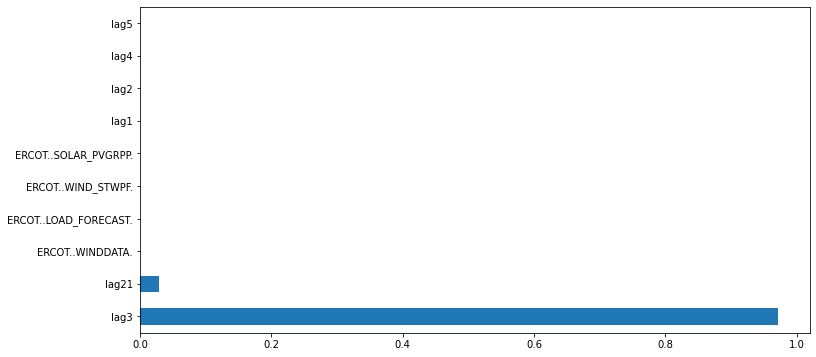

In [31]:
from sklearn.tree import DecisionTreeRegressor
regrtree = DecisionTreeRegressor(max_leaf_nodes = 5)
regrtree.fit(train_X, train_y)
feat_importances = pd.Series(regrtree.feature_importances_, index=train_X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(12,6))
plt.show()

In [32]:
pred1 = regrtree.predict(test_X)
err1 = smape(tt['Median Smooth'], pred1)
print('SMAPE for Decision Tree for week ahead : ', "{:.4}%".format(err1))


SMAPE for Decision Tree for week ahead :  121.9%


## Random Forest Model

C:\Users\TAGBOA~1\AppData\Local\Temp/ipykernel_47724/753912659.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(train_X, train_y)


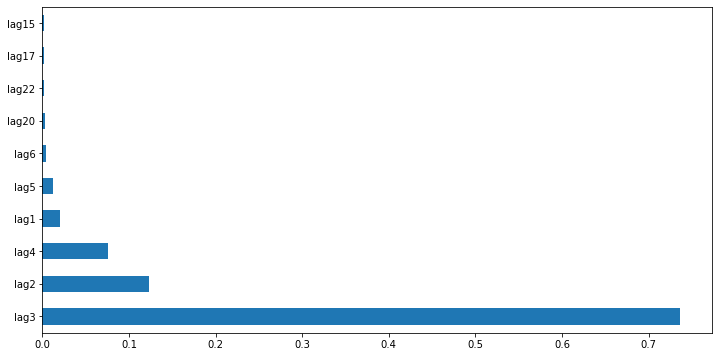

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_X, train_y)
feat_importances = pd.Series(forest_reg.feature_importances_, index=train_X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(12,6))
plt.show()

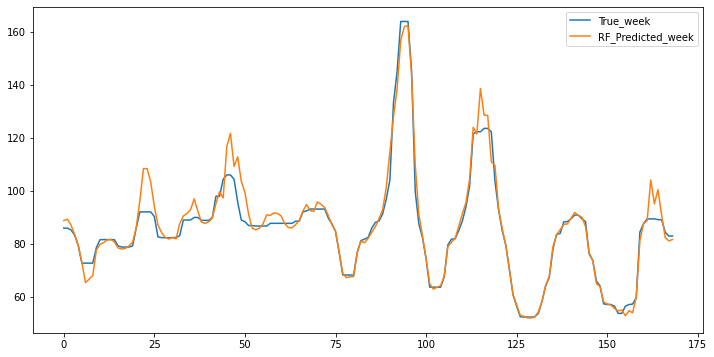

In [36]:
forest_pred = forest_reg.predict(test_X)
tt['RF_Predicted_week'] = forest_pred
tt[['True_week', 'RF_Predicted_week']].plot(legend=True,figsize=(12,6))
plt.show()

In [37]:

err1 = smape(tt['Median Smooth'], forest_pred)
print('SMAPE for Random Forest for week ahead : ', "{:.4}%".format(err1))


SMAPE for Random Forest for week ahead :  2.777%


In [39]:
tt[['True_week', 'RF_Predicted_week']].head(30)

,True_week,RF_Predicted_week
0,85.8525,88.726925
1,85.8525,89.222025
2,85.1600,86.977825
3,83.2050,83.431300
4,79.3225,79.325900
5,72.6325,72.879800
6,72.6325,65.289900
7,72.6325,66.564425
8,72.6325,67.976225
9,78.4625,77.568025


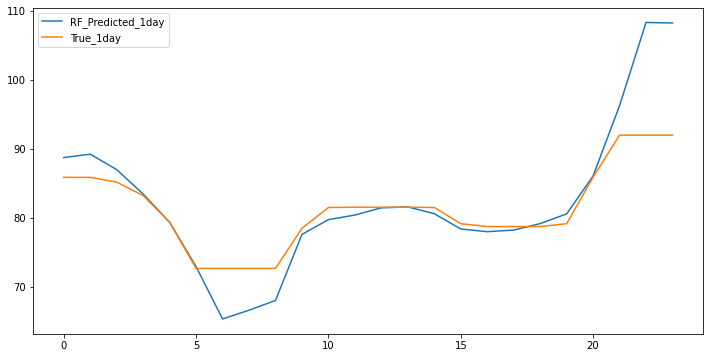

In [40]:
pred2 = forest_reg.predict(test_X.iloc[:24,])
aa = pd.DataFrame(pred2, columns = ['RF_Predicted_1day'])
bb = pd.DataFrame(tt['Median Smooth'].iloc[:24,])
aa['True_1day'] = bb['Median Smooth']
aa.plot(legend=True,figsize=(12,6))
plt.show()

In [41]:
err1 = smape(tt['Median Smooth'].iloc[:24,], pred2)
print('SMAPE for Random_Forest for day ahead: ', "{:.4}%".format(err1))

SMAPE for Random_Forest for day ahead:  3.506%


In [42]:
aa

,RF_Predicted_1day,True_1day
0,88.726925,85.8525
1,89.222025,85.8525
2,86.977825,85.1600
3,83.431300,83.2050
4,79.325900,79.3225
5,72.879800,72.6325
6,65.289900,72.6325
7,66.564425,72.6325
8,67.976225,72.6325
9,77.568025,78.4625


In [44]:
raw_lmp = test['WAKEWE_ALL..RTLMP.'].reset_index()

In [46]:
raw_lmp['forest_pred'] = forest_pred
raw_lmp

,DATETIME,WAKEWE_ALL..RTLMP.,forest_pred
0,2022-08-22 00:00:00,83.2050,88.726925
1,2022-08-22 01:00:00,79.3225,89.222025
2,2022-08-22 02:00:00,72.6325,86.977825
3,2022-08-22 03:00:00,62.8700,83.431300
4,2022-08-22 04:00:00,61.0475,79.325900
...,...,...,...
164,2022-08-28 20:00:00,78.2375,100.341025
165,2022-08-28 21:00:00,84.2475,90.764400
166,2022-08-28 22:00:00,73.8950,82.235275
167,2022-08-28 23:00:00,82.8525,81.019050


In [47]:
train_y2 = train['WAKEWE_ALL..RTLMP.']

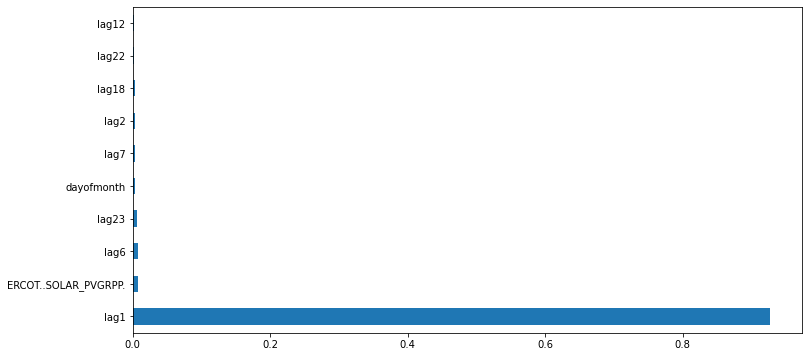

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(train_X, train_y2)
feat_importances = pd.Series(forest_reg.feature_importances_, index=train_X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(12,6))
plt.show()

In [ ]:
forest_pred2 = forest_reg.predict(test_X)
tt['RF_Predicted_week'] = forest_pred
tt[['True_week', 'RF_Predicted_week']].plot(legend=True,figsize=(12,6))
plt.show()